# Movie Recommendation systems

## Introduction

This will be me first `Real World ML` project which I wanted to make for a long time. I'll be making a recommendation system for movies. Every resourse I used in this project is in my github repository. 

In this notebook, I will explain How I made the recommendation system for movies, what concepts I used and how I implemented them. I'll also explain the concepts I used in this project. You can follow me for more projects like this.

- LinkedIn:https://www.linkedin.com/in/md-rishat-talukder-a22157239/
- gitub: https://github.com/RishatTalukder/learning_machine_learning/tree/main
- Youtube: https://www.youtube.com/channel/UCEEkKXpAkSwcMaIHnGi3Niw


## Movie recommendation system

SO, I will try make a recommendation system for movies. Where I'll will analyze the data and try to make a recommendation system. Datasets I'm using are in the dataset folder of this notebook file.

SO, I'll start by importing the datasets and libraries.

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

Libraries are imported we will start by importing the ratings dataset. 

In [78]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset/u.data',sep='\t', names=col_names)

In [79]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


So, you can see that the dataset has 4 columns. The first column is the user id, the second column is the item id, the third column is the rating given by the user to the item and the fourth column is the timestamp and there are 100k rows in the dataset. Now will import another dataset which is the movies dataset.

























In [81]:
movie = pd.read_csv('dataset/Movie_Id_Titles')
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


There you go. We have imported the movies title dataset as well. Now, If you look closely at the dataset, the dataset has 2 columns. The first column is the item id and the second column is the title of the movie. 

The dataset itself is very uselesss because the it only contains the title of the movie adn nothing else. So, we have to be cleaver and merge the two datasets to make a useful dataset. Now by merging the two datasets I mean that we have to merge the two datasets on the item id column.

Because both the datasets has the item id column and the item_id column refers to the same movie in both the datasets. So, we can merge the two datasets on the item id column. So, let's do that.

In [82]:
df = pd.merge(df, movie, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


The two datasets are merged and now we have a new dataset which contains the user id, the item id, the rating given by the user to the item, the timestamp and the title of the movie. Now, we will analyze the dataset and try to make a recommendation system.

Let's do some exploratory data analysis on the dataset. We will start by checking the average rating of the movies. So, let's do that.

In [83]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

Here we have the average rating of the movies. The average rating of the movies are not same but these are not clear because the average rating is measured by taking the sum of all the ratings given to the movie and then dividing it by the number of ratings given to the movie.


So, suppose a movie has only `1` rating and the rating is `5` then the average rating of the movie will be `5`. But if a movie has `100` ratings and the average rating of the movie is `4.5` then the average rating of the movie will be `4.5`. So, the average rating of the movie is not a good measure to measure the quality of the movie. So, we have to be cleaver and use some other measure to measure the quality of the movie.

So, What we can do is sort the movies by the number of ratings given to the movie. 


In [84]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Here, we have a sorted movies list with the highest count of rating. SO, to keep this simple I will make a `dataframe` of the top movies with the highest count of ratings. So, let's do that.

In [85]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now, we cna add another column to the dataset which is the count of ratings given to the movie. So, that we can know how legit the rating of the movie is. So, let's do that.

In [86]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [87]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Nice and easy. We have added the count of ratings given to the movie. let's see the dataset.

Text(0, 0.5, 'Number of Movies')

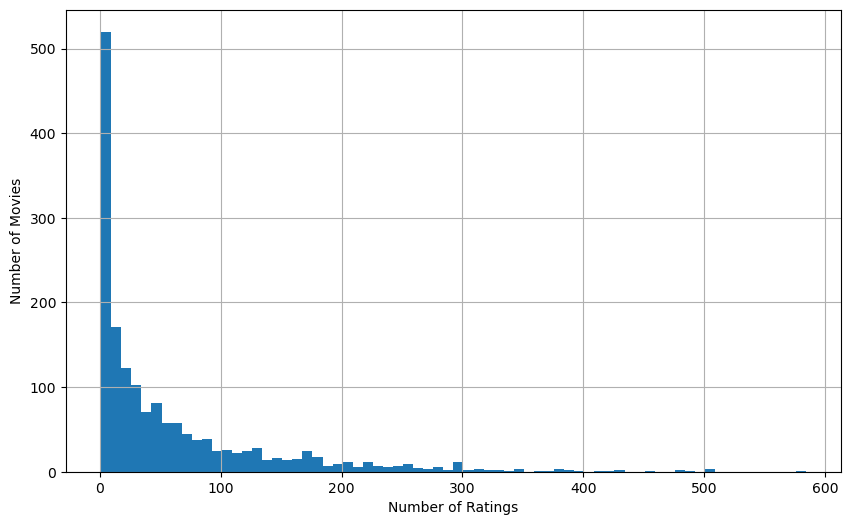

In [88]:
ratings['num of ratings'].hist(bins=70, figsize=(10,6))
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')

The `histogram` shows that most amaount of movies have the rating count of `0-10` and as the rating count increases the number of movies with that rating count decreases. Now let's see the rating.

<Axes: >

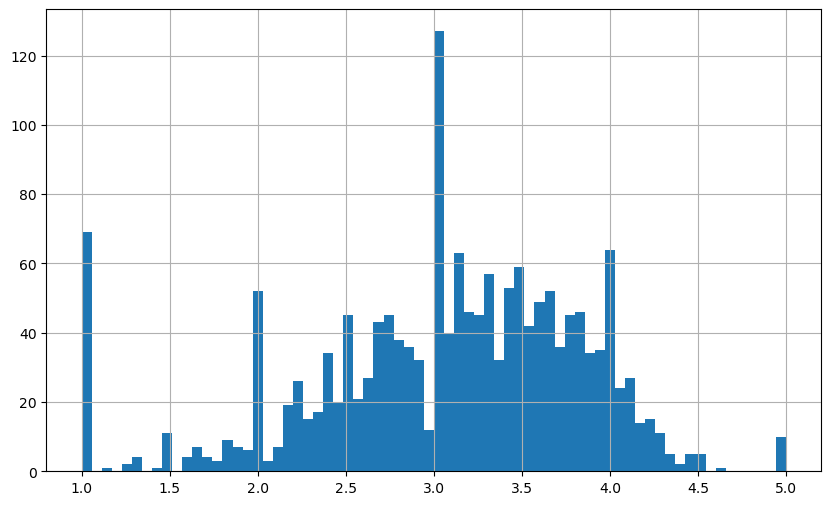

In [89]:
ratings['rating'].hist(bins=70, figsize=(10,6))

WEll, this shows that the rating of the movies are not same. But we can clearly see that the The first place is taken by the rating `3.0` and the second place is taken by the rating `1.0`. We can see that almost `120` movies have the rating of `3.0` and almost `80` movies have the rating of `1.0`. So, the rating of the movies.

Now here's a concept and a fact about movies: `As the number of rating rises the rating of the movie tends to be higher`. 

This is because In real life people tend to see the `blockbuster` movies and the `blockbuster` movies have the highest number of ratings. So, the rating of the `blockbuster` movies tends to be higher. So, we have to be cleaver and use some other measure to measure the quality of the movie dataset to see if the rating of the movie is legit or not.

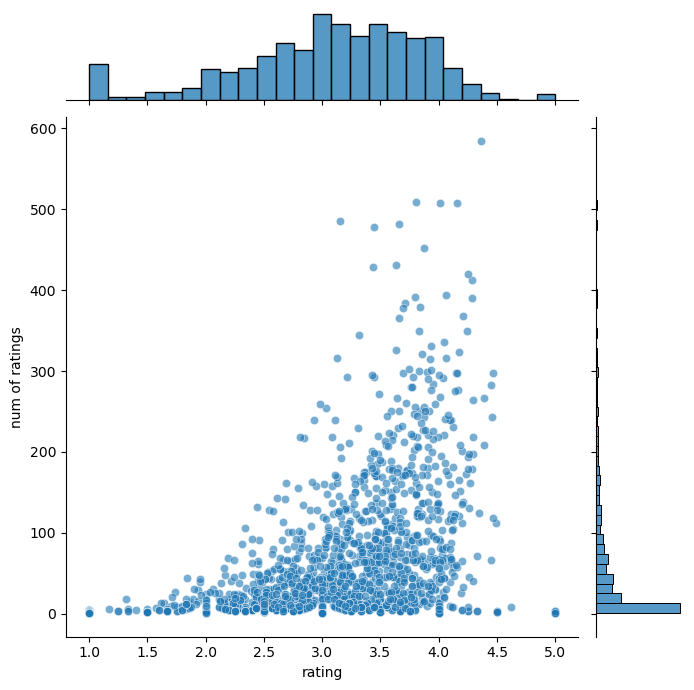

In [90]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=.6, height=7)

Well, the scatter plot is showing the same thing that the rating of the movies are rising as the number of ratings given to the movie is rising. SO, we can now move on to the recommendation system because the dataset looks good and we have analyzed the dataset as well.


## Building the recommendation system

Now, we will build the recommendation system. We will start by creating a `pivot table` which will contain the user id, the item id and the rating given by the user to the item. So, let's do that.

Before coding I want to explain the concept of `collaborative filtering`. 

### Collaborative filtering

Collaborative filtering is a method used by recommender systems to make predictions about the interests of a user by collecting preferences from many users. The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue.

There are two types of collaborative filtering:

- **User-User Collaborative filtering**: Here we find look alike customers (based on similarity) and offer products based on what his/her look alike has chosen. This algorithm is very effective but takes a lot of time and resources. It requires to compute every customer pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

- **Item-Item Collaborative filtering**: It is quite similar to the previous algorithm, but instead of finding customer look alike, we try finding item look alike. Once we have item look alike matrix, we can easily recommend alike items to customer who have purchased any item from the store. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new customer the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between customers. And with fixed number of products, product-product look alike matrix is fixed over time.

So, we will use the `item-item collaborative filtering` to build the recommendation system. So, let's do that.

#### Why Item-Item Collaborative Filtering?

- The `item-item collaborative filtering` is more `scalable` and `stable` than the `user-user collaborative filtering`. The `item-item collaborative filtering` is more `scalable` because the number of items is less than the number of users. The `item-item collaborative filtering` is more `stable` because the number of items is fixed over time. So, we will use the `item-item collaborative filtering` to build the recommendation system.

SO, we have a `dataframe` which contains the user id, the item id and the rating given by the user to the item. It's more likely for us to find the similarity between the items. So, we will create a `pivot table` which will contain the user id, the item id and the rating given by the user to the item. So, let's do that.

In [91]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [92]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This gave us a `pivot table` which contains the user id and the rating given by the user to the movie. 

Now, here is a question: `Can you see the similarity between the movies?`

The answer is `No`. You can see that almost all the movies have the `NaN` value. Meaning the user has not rated the movie. This is natural because the user cannot rate all the movies. So, we have to be cleaver and find the similarity between the movies. So, we will use the `correlation` to find the similarity between the movies. So, let's do that.


## Finding the similarity between the movies

We will find the similarity between the movies using the `correlation`. The `correlation` is a `statistical` measure which tells us how much two variables are related to each other. The `correlation` ranges from `-1` to `1`. If the `correlation` is `1` then the two variables are `positively` related to each other. If the `correlation` is `-1` then the two variables are `negatively` related to each other. If the `correlation` is `0` then the two variables are `not related` to each other.

So, we will find the similarity between the movies using the `correlation`. So, let's do that.

TO do that we will first sort the movies by the number of ratings given to the movie. So, that we can find the similarity between the movies. So, let's do that. then we can take movies and find the similarity between the movies. So, let's do that.

In [93]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


There are many good rated movies in the dataset. So, we will take the `Star Wars` movie and find the similarity between the `Star Wars` movie and the other movies and we will also take `contact` movie and find the similarity between the `contact` movie and the other movies. So, let's do that.

SO, we will make a `dataframe` which will contain the `Star Wars` movies user id and the rating given by the user to the `Star Wars` movie and also do the same for the `contact` movie.

In [94]:
starwars_user_ratings = moviemat['Star Wars (1977)']
contact_user_ratings = moviemat['Contact (1997)']

In [95]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [96]:
contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

So, there you go. We have the user rating dataframe for the `Star Wars` movie and the `contact` movie. Now time for the similarity between the movies.

In [97]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars[:10]

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

`corrwith` is a `pandas` function which is used to find the correlation between the two variables. We used the `corrwith` function to find the correlation between the `Star Wars` movie and the other movies and also used the `corrwith` function to find the correlation between the `contact` movie and the other movies.

> `corrwith` returns a `series` which contains the correlations so we have to transform the `series` into a `dataframe` to make it more readable. So, let's do that.

In [98]:
similar_to_contact = moviemat.corrwith(contact_user_ratings)
similar_to_contact[:10]

title
'Til There Was You (1997)                      0.904534
1-900 (1994)                                        NaN
101 Dalmatians (1996)                         -0.108441
12 Angry Men (1957)                            0.022265
187 (1997)                                     0.135512
2 Days in the Valley (1996)                    0.248031
20,000 Leagues Under the Sea (1954)            0.052442
2001: A Space Odyssey (1968)                   0.014245
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                          -0.538617
dtype: float64

as you can see these two are `pandas` series and we have to transform these two series into a `dataframe` to make it more readable and also you can see that the `NaN` values are present in the dataset. So, we have to remove the `NaN` values from the dataset

In [99]:
corr_with_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_with_starwars.dropna(inplace=True)
corr_with_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [100]:
corr_with_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_with_contact.dropna(inplace=True)
corr_with_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


We have removed the `NaN` values from the dataset and now we have a `dataframe` which contains the similarity between the `Star Wars` movie and the other movies and also contains the similarity between the `contact` movie and the other movies. Now we will sort the `dataframe` by the similarity to see the most similar movies to the `Star Wars` movie and the `contact` movie. So, let's do that.
























In [101]:
corr_with_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


HUH!!!

What just happend? What is this? I have never heard of these movies before. How are these movies similar to the `Star Wars` movie.

This is a common problem in the recommendation system. The recommendation system is not perfect and it is not always accurate. The recommendation system is based on the data. So suppose an user has rated the `Star Wars` movie and given the rating of `5` to the `Star Wars` movie and the user has also rated the `Alien` movie and given the rating of `5` to the `Alien` movie. Then the recommendation system will recommend the `Alien` movie to the user because the user has rated the `Star Wars` movie and the `Alien` movie the same and the user is the same.

Now, the system does not know that the `Star Wars` movie has `500+` ratings and the `Alien` movie has `10` ratings. But the system can only see the ratings given by the user to the movies. And according to the correlation algorithm the `Star Wars` movie and the `Alien` movie are similar to each other. So, the system will recommend the `Alien` movie to the user.

SO, we need to have a way to find legit recommendations.  We will take a threshold of the number of ratings given to the movie. We will take the movies which have the rating count of `100` and then we will find the similarity between the `Star Wars` movie.

THis way we can find the legit recommendations. So, let's do that.

we will start by joining the `rating_count` dataframe with the `similarity` dataframe.

In [102]:
corr_with_starwars = corr_with_starwars.join(ratings['num of ratings'])

In [103]:
corr_with_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now we sort the `corr_starwars` dataframe by the threshold of the rating count and then we will see the most similar movies to the `Star Wars` movie

In [104]:
corr_with_starwars[corr_with_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


There, we have a list of the most similar movies to the `Star Wars` movie. It's more likely that the user will like the `Empire Strikes Back` movie if the user has liked the `Star Wars` movie because the `Empire Strikes Back` movie is the next part of the `Star Wars` movie. So, the user will like the `Empire Strikes Back` movie if the user has liked the `Star Wars` movie. Then as we can see the `Return of the Jedi` movie is the next part of the `Empire Strikes Back` movie and so on. 

SO, we can see this technique is very useful and we can make a recommendation system using this technique. So, we have successfully built a recommendation system using the `item-item collaborative filtering` and the `correlation` algorithm.

Let's finish this recommendation system by doing the same for the `contact` movie.

In [105]:
corr_with_contact = corr_with_contact.join(ratings['num of ratings'])

In [106]:
corr_with_contact.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [107]:
corr_with_contact[corr_with_contact['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


AAANDDD there you have it. A movie recommendation system with the `item-item collaborative filtering` and you can also make it Very easily.

## Conclusion

We have successfully built a recommendation system and this is my first `Real World ML` project. I have learned a lot from this project and I hope you have learned a lot as well.

I hope you liked this article and if you have any questions or suggestions then feel free to ask me in the comments section below.


##### Happy collabortive filtering!!